In [ ]:
# import Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# regression package
import statsmodels.api as sm

# sentiment analysis packages
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from textblob import TextBlob

# topic modeling packages
import gensim
from gensim import corpora

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# New Section

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#for the topic modeling!
from sklearn.decomposition import NMF

In [ ]:
df = pd.read_csv('spotify_millsongdata.csv', engine='python')


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
#removes those weird slash things from the lyrics
df['text'] = df['text'].str.replace(' \r\n','')
df['text'] = df['text'].str.replace('\r\n\r\n','')

In [ ]:
df['text'].iloc[0]

"Look at her face, it's a wonderful face And it means something special to me Look at the way that she smiles when she sees me How lucky can one fellow be?  She's just my kind of girl, she makes me feel fine Who could ever believe that she could be mine? She's just my kind of girl, without her I'm blue And if she ever leaves me what could I do, what could I do?  And when we go for a walk in the park And she holds me and squeezes my hand We'll go on walking for hours and talking About all the things that we plan  She's just my kind of girl, she makes me feel fine Who could ever believe that she could be mine? She's just my kind of girl, without her I'm blue And if she ever leaves me what could I do, what could I do?"

In [ ]:
t_swift = df[df['artist'] == 'Taylor Swift'].drop('link', axis=1)

bag of words

    -count the amount of times a word appears in a sentence
    
    -codify text data into numerical maapping

In [ ]:
#stop words - words that don't add to our meaning of what is currently going on (i, the, and..)
stop_words = stopwords.words('english')

In [ ]:
#adding other words that may be considered stop words
stop_words.extend(['yeah', 'oh','let', 'still', 'wanna', 'got','would','cause','like','ever', 'one', 'come', 'back','place', 'said','put', 'things'])

vectorizer --> bag of words

min_df --> is there a certain number of songs that a word should appear in order for us to include it? 

    let's say 10% of a songs (a heuristic but whatevs)

In [ ]:
vectorizer = TfidfVectorizer(stop_words = stop_words , min_df = 0.1)

going through each t swift song, and counting how often each word appears in a song

    and also looking at the document frequency of the word (how often the word appears ACROSS songs)
    
    then quantifies into scores!!

In [ ]:
tfidf = vectorizer.fit_transform(t_swift['text'])

## Topic Modeling

n_components is how many topics are in our topic model

how many topic is best? it depends 

In [ ]:
nmf = NMF(n_components = 6)

In [ ]:
topic_values = nmf.fit_transform(tfidf)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


what are the words that the nmf chose for each topic?

In [ ]:
for topic_num, topic in enumerate(nmf.components_):
    message = 'Topic #{}: '.format(topic_num + 1)
    message += ' '.join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11 :-1]])
    print(message)

Topic #1: know us say tell standing room alone better see next
Topic #2: eyes keep make want baby see everything beautiful think please
Topic #3: remember night time last made fly mine well around best
Topic #4: forever always baby something feel gone everything knew mean wrong
Topic #5: never smile love chorus way fall today go break stay
Topic #6: girl home think song look gone see dress long know


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


there are some words that don't add context here, ('yeah', 'oh', 'let', 'cause') so we can consider them stop words!! extend stop_words list

now let's name these topics!

In [ ]:
topic_labels = ['alone','love','remincising','longing','heartbreak','independence']

In [ ]:
df_topics = pd.DataFrame(topic_values, columns = topic_labels)

In [ ]:
df_topics

,alone,love,remincising,longing,heartbreak,independence
0,0.032566,0.000000,0.052144,0.042344,0.384936,0.000000
1,0.000000,0.459024,0.119116,0.047287,0.064189,0.000000
2,0.359799,0.149626,0.000000,0.000000,0.000000,0.000000
3,0.127922,0.000000,0.233625,0.000000,0.167218,0.032143
4,0.082178,0.000000,0.000000,0.133767,0.222316,0.100696
...,...,...,...,...,...,...
76,0.000000,0.107281,0.105527,0.000000,0.000000,0.324721
77,0.000000,0.000000,0.000494,0.035158,0.277065,0.000000
78,0.148194,0.000000,0.038797,0.000000,0.000000,0.000000
79,0.079288,0.122282,0.225133,0.027165,0.025228,0.073790


In [ ]:
#resets index so the join statement can work 
t_swift = t_swift.reset_index(drop=True)

In [ ]:
t_swift = t_swift.join(df_topics)

In [ ]:
t_swift

,artist,song,text,alone,love,remincising,longing,heartbreak,independence
0,Taylor Swift,Cold As You,You have a way of coming easily to me And when...,0.032566,0.000000,0.052144,0.042344,0.384936,0.000000
1,Taylor Swift,Crazier,"I've never gone with the wind, just let it flo...",0.000000,0.459024,0.119116,0.047287,0.064189,0.000000
2,Taylor Swift,Everything Has Changed,All I knew this morning when I woke Is I know ...,0.359799,0.149626,0.000000,0.000000,0.000000,0.000000
3,Taylor Swift,Fifteen,You take a deep breath And you walk through th...,0.127922,0.000000,0.233625,0.000000,0.167218,0.032143
4,Taylor Swift,Hey Stephen,"Hey Stephen, I know looks can be deceiving But...",0.082178,0.000000,0.000000,0.133767,0.222316,0.100696
...,...,...,...,...,...,...,...,...,...
76,Taylor Swift,Tim McGraw,He said the way my blue eyes shined Put those ...,0.000000,0.107281,0.105527,0.000000,0.000000,0.324721
77,Taylor Swift,Today Was A Fairytale,Today was a fairytale You were the prince I us...,0.000000,0.000000,0.000494,0.035158,0.277065,0.000000
78,Taylor Swift,White Christmas,I'm dreaming of a white Christmas Just like th...,0.148194,0.000000,0.038797,0.000000,0.000000,0.000000
79,Taylor Swift,White Horse,Say you're sorry That face of an angel Comes o...,0.079288,0.122282,0.225133,0.027165,0.025228,0.073790


# Sentiment Analysis

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index+=1
        return word_list
    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk import word_tokenize
def simple_sentiement_analysis(artist):
    
    artist_df = df[df['artist'] == artist].drop('link', axis=1)
    artist_df[['song', 'text']] = artist_df[['song', 'text']].values.astype('str')
    df_song = list(artist_df['song'])
    df_lyrics = list(artist_df['text'])
    
    results=[]
    positive_words,negative_words = get_pos_neg_words()
    for index, text in enumerate(df_lyrics):
        pos = neg = 0
        for word in word_tokenize(text):
            if word in positive_words:
                pos+=1
            if word in negative_words:
                neg+=1
        pos_ratio = round(pos/len(word_tokenize(text))*100,2)
        neg_ratio = round(neg/len(word_tokenize(text))*100,2)
        results.append((df_song[index],pos_ratio,neg_ratio))
    return results

In [ ]:
simple_sentiement_analysis('Lana Del Rey')

[('Afraid', 2.98, 4.71),
 ('Aviation', 2.3, 1.15),
 ('Because Of You', 5.22, 3.21),
 ('Brite Lites', 9.72, 0.0),
 ('Cruel World', 4.43, 4.43),
 ('Dum Dum', 2.3, 1.92),
 ('Fake Diamonds', 5.57, 3.54),
 ('Flipside', 0.62, 2.78),
 ('Goodbye Kiss', 1.41, 3.53),
 ('Last Girl On Earth', 4.42, 2.76),
 ('Never Let Me Go', 2.77, 0.82),
 ('Noir', 9.93, 4.45),
 ('Off To The Races', 2.49, 2.78),
 ('Oh Say Can You See', 1.09, 1.09),
 ('Old Money', 3.52, 1.06),
 ('On Our Way', 3.25, 1.78),
 ('Once Upon A Dream', 2.22, 0.0),
 ('Ooh Baby', 4.08, 0.23),
 ('Out With A Bang', 0.73, 2.56),
 ('Pin Up Galore', 0.0, 6.0),
 ('Pretty When You Cry', 6.55, 5.06),
 ('Puppy Love', 6.96, 1.19),
 ('Ride', 3.22, 5.14),
 ('Serial Killer', 6.12, 2.25),
 ('Yes To Heaven', 3.8, 0.84),
 ('Young And Beautiful', 7.49, 1.44),
 ('1949', 2.69, 1.92),
 ('A Star For Nick', 0.0, 0.0),
 ('American', 7.77, 3.63),
 ('Angels Forever', 3.45, 1.72),
 ('Baby Blue Love', 3.38, 1.13),
 ('Back To The Basics', 2.78, 1.04),
 ('Backfire', 2.9

In [ ]:
#Top 5 positive songs
sorted(simple_sentiement_analysis('Lana Del Rey'), key=lambda k: k[1], reverse=True)[:5]

[('Noir', 9.93, 4.45),
 ('Brite Lites', 9.72, 0.0),
 ('Paradise', 9.17, 2.46),
 ('Children Of The Bad Revolution', 8.88, 4.31),
 ('Kill Kill', 8.09, 4.41)]

In [ ]:
#Average score of positive scores
import statistics
list_ = []
for song in simple_sentiement_analysis('Lana Del Rey'):
    list_.append(song[1])
print(round(statistics.mean(list_),2))

4.04


In [ ]:
#Top 5 negative songs
sorted(simple_sentiement_analysis('Lana Del Rey'), key=lambda k: k[2], reverse=True)[:5]

[('Summertime Sadness', 3.05, 7.93),
 ('Big Eyes', 4.55, 7.73),
 ('Bad Disease', 1.63, 7.32),
 ('Born To Die', 3.93, 6.7),
 ('Is This Happiness', 4.27, 6.1)]

In [ ]:
#Average score of negative scores
import statistics
list_ = []
for song in simple_sentiement_analysis('Lana Del Rey'):
    list_.append(song[2])
print(round(statistics.mean(list_),2))

2.48


In [ ]:
simple_sentiement_analysis('Drake')

[('6 Man', 3.14, 3.14),
 ('Believe It Or Not', 2.77, 2.77),
 ('Best I Ever Had', 3.52, 1.57),
 ('Brand New', 2.99, 2.99),
 ('Cameras', 2.06, 1.83),
 ('Come Thru', 0.6, 0.74),
 ('Enough Said', 0.72, 1.79),
 ('Furthest Thing', 1.72, 2.86),
 ('Headlines', 3.17, 2.18),
 ("Hold On We're Going Home And From Time", 5.38, 2.0),
 ('HYFR', 5.0, 5.14),
 ("I'm Ready For You", 4.93, 0.9),
 ("I'm Still Fly", 1.81, 1.64),
 ('Independent Queen', 2.5, 0.96),
 ('Juice', 3.54, 1.18),
 ('Karaoke', 0.93, 3.4),
 ('Know Yourself', 0.81, 4.2),
 ('Light Up', 2.18, 3.33),
 ('Make Me Proud', 4.08, 2.72),
 ('Messages From You', 2.29, 4.87),
 ('My Side', 0.95, 2.14),
 ("No Tellin'", 0.96, 1.82),
 ('Pop Style', 4.06, 2.64),
 ('Preach', 1.98, 2.54),
 ('Replacement Girl', 2.48, 2.01),
 ('Right Hand', 4.5, 1.06),
 ('Runaway Girl', 1.8, 1.8),
 ("Say What's Real", 1.81, 2.64),
 ('Still Here', 2.8, 0.56),
 ('Stunt Hard', 2.1, 3.64),
 ('Stunt On You', 0.85, 2.54),
 ('Sweeterman (Remix)', 2.46, 1.06),
 ('Take Care', 2.21, 

In [ ]:
#Top 5 positive songs
sorted(simple_sentiement_analysis('Drake'), key=lambda k: k[1], reverse=True)[:5]

[('Find Your Love', 7.65, 0.55),
 ('Show Me A Good Time', 5.78, 2.0),
 ('Grammys', 5.59, 1.24),
 ("Hold On We're Going Home And From Time", 5.38, 2.0),
 ('HYFR', 5.0, 5.14)]

In [ ]:
#Average score of positive scores
import statistics
list_ = []
for song in simple_sentiement_analysis('Drake'):
    list_.append(song[1])
print(round(statistics.mean(list_),2))

2.62


In [ ]:
#Top 5 negative songs
sorted(simple_sentiement_analysis('Drake'), key=lambda k: k[2], reverse=True)[:5]

[('Wednesday Night Interlude', 1.99, 7.17),
 ('Own It', 1.13, 6.04),
 ('A Little Favour', 3.33, 5.42),
 ('HYFR', 5.0, 5.14),
 ('Messages From You', 2.29, 4.87)]

In [ ]:
#Average score of negative scores
import statistics
list_ = []
for song in simple_sentiement_analysis('Drake'):
    list_.append(song[2])
print(round(statistics.mean(list_),2))

2.42


# Word Cloud

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def wordcloud(song, artist):
    df['text'] = df['text'].str.replace(' \r\n','')
    df['text'] = df['text'].str.replace('\r\n\r\n','')
    index = df[(df['song'] == song) & (df['artist'] == artist)].index.values[0]
    text = df['text'].iloc[index]
    
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline

    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)


    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
wordcloud('Break Free', 'Ariana Grande')

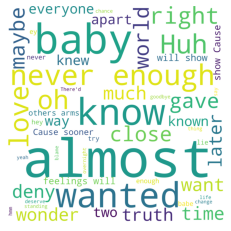

In [ ]:
wordcloud('Almost Is Never Enough', 'Ariana Grande')

# Recommendation System using text similary (Df cut to 10000 songs]

In [ ]:
df_10k=df[:10000]
df_10k

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face And it..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please Touch me gently l..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go Why I had to p...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
9995,Justin Bieber,All Bad,/j/justin+bieber/all+bad_21071754.html,"[Verse:] It's another, if it ain't one thing I..."
9996,Justin Bieber,All I Want Is You,/j/justin+bieber/all+i+want+is+you_20985618.html,Sitting here all alone watching the snow fall ...
9997,Justin Bieber,As Long As You Love Me,/j/justin+bieber/as+long+as+you+love+me_210218...,"As long as you love me (love me, love me) As l..."
9998,Justin Bieber,Baby Lady,/j/justin+bieber/baby+lady_20467491.html,Put me in a outfit from the gap like that. One...


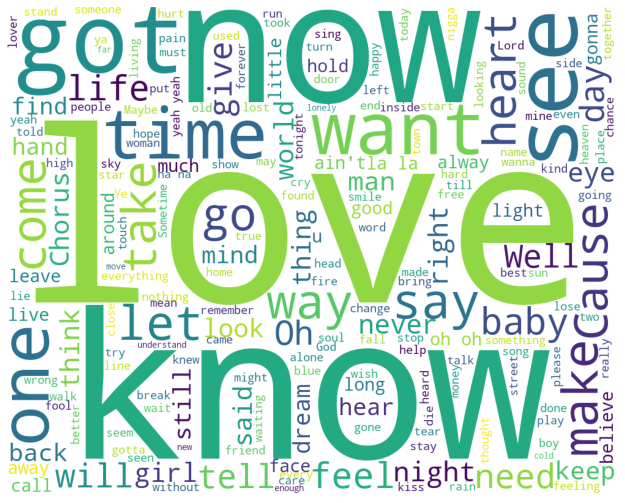

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Import matplotlib
import matplotlib.pyplot as plt 

# Prepare song overview
paragraph=" ".join(df_10k.text.to_list())

# Create stopword list
stopword_list = set(list(STOPWORDS) + ['br',]) 

# Create WordCloud 
word_cloud = WordCloud(width = 1000, height = 800, 
                       background_color ='White', 
                       stopwords = stopword_list, 
                       min_font_size = 14).generate(paragraph) 

# Set wordcloud figure size
plt.figure(figsize = (15, 9)) 

# Show image
plt.imshow(word_cloud) 

# Remove Axis
plt.axis("off")  

# save word cloud
# plt.savefig('wordcloud.jpeg',bbox_inches='tight')

# show plot
plt.show()

In [ ]:
tfidf = TfidfVectorizer(analyzer='word',
                      token_pattern=r'\w{1,}',
                      ngram_range=(1, 3), 
                      stop_words = 'english')

# Filling NaNs with empty string
df_10k['text'] = df_10k['text'].fillna('')

# Fitting the TF-IDF on the 'overview' text
tfidf_matrix = tfidf.fit_transform(df_10k['text'])

tfidf_matrix.shape

<ipython-input-53-fb075b1a558e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10k['text'] = df_10k['text'].fillna('')


(10000, 1140012)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
# Compute the Cosine Similarity
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a pandas series with song titles as indices and indices as series values 
indices = pd.Series(df_10k.index, index=df_10k['song']).drop_duplicates()



In [ ]:
song='Hey Baby'

# Get the index corresponding to song title
index = indices[song]

# Get the cosine similarity scores 
similarity_scores = list(enumerate(similarity_matrix[index]))


# Sort the similarity scores in descending order
sorted_similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)


# Top-10 most similar songs scores
top_10_songs_scores = sorted_similarity_scores[1:11]

# Get movie indices
top_10_songs_indices=[]
for i in top_10_songs_scores:
    top_10_songs_indices.append(i[0])
    
# Top 10 recommended songs with the artists
df[['artist','song']].iloc[top_10_songs_indices]

,artist,song
5371,Eric Clapton,Hey Hey
5244,Enrique Iglesias,There Goes My Baby
942,Avril Lavigne,The Best Damn Thing
1005,Backstreet Boys,Weird World
9487,John Martyn,Over The Hill
1889,Bonnie Raitt,Walking The Dog
5758,Fabolous,No Need For Conversation
5779,Fabolous,This Is My Party
7661,Heart,Under The Sky
477,Alice Cooper,Between High School And The Old School


The function

In [ ]:
songs_recommendation('Hey Baby')

NameError: ignored

In [ ]:

def songs_recommendation(song):


# Get the index corresponding to song title
    index = indices[song]

# Get the cosine similarity scores 
    similarity_scores = list(enumerate(similarity_matrix[index]))


# Sort the similarity scores in descending order
    sorted_similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)


# Top-10 most similar songs scores
    top_10_songs_scores = sorted_similarity_scores[1:11]

# Get songs indices
    top_10_songs_indices=[]
    for i in top_10_songs_scores:
        top_10_songs_indices.append(i[0])
    
# Top 10 recommended songs and their respective artists
    result= df_10k[['artist','song']].iloc[top_10_songs_indices]
    
    return result

# Recommendation System using audio features (DF cut to 50k songs)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import sigmoid_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
scaler = MinMaxScaler()

In [ ]:
attributes=['acousticness','danceability', 'duration_ms', 'energy',
              'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
              'speechiness', 'tempo','valence',]

In [ ]:
norm_df = scaler.fit_transform(df.loc[0:50000,attributes])

In [ ]:
#pandas series w song titles as indices and indices as series values
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

In [ ]:
#create cosine similarity matrix based on given matrix
cosine = cosine_similarity(norm_df)
cosine

In [ ]:
def song_recommendation(name):
    idx = indices[name]
    score = list(enumerate(cosine[indices['Second Moon']]))
    similarity_score = sorted(score, key = lambda x:x[1], reverse = True)
    similarity_score = similarity_score[1:6]
    song_idx = [i[0] for i in similarity_score]

    top_five = df[['name', 'artists']].iloc[song_idx]
    return top_five

In [ ]:
song_recs = song_recommendation('Second Moon')
song_recs

In [ ]:
df.loc[song_recs['name'].isin(df['name']).index, : ]